## Random Walk with numpy

In [1]:
import numpy as np

np.random.seed(42)

steps = np.random.standard_normal(1000)
steps[0] = 0

random_walk = np.cumsum(steps)

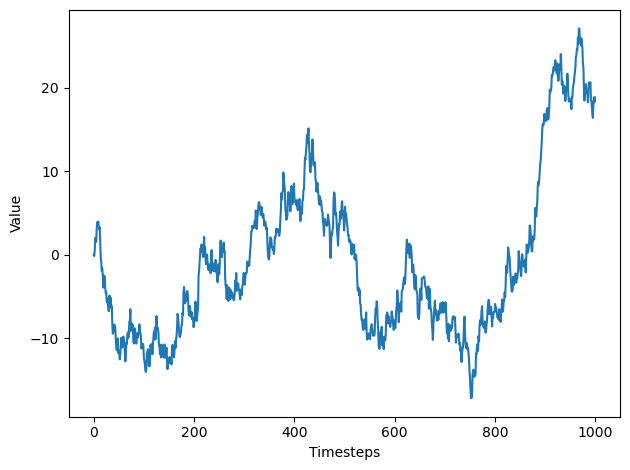

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")

plt.tight_layout()

In [5]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(random_walk)
print(f"ADF stats: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF stats: -0.965952487691875
p-value: 0.7654789696692581


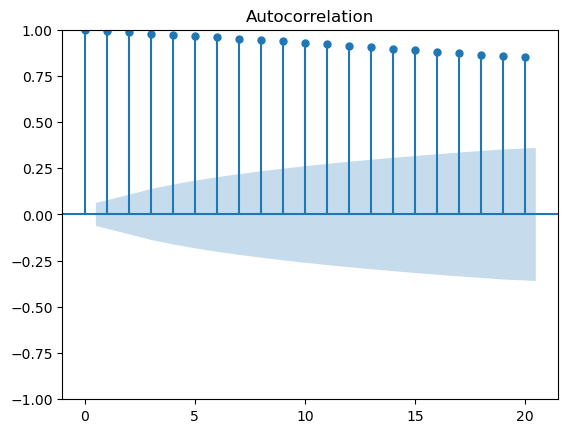

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(random_walk, lags=20);

In [9]:
diff_random_walk = np.diff(random_walk, n=1)

Text(0, 0.5, 'Value')

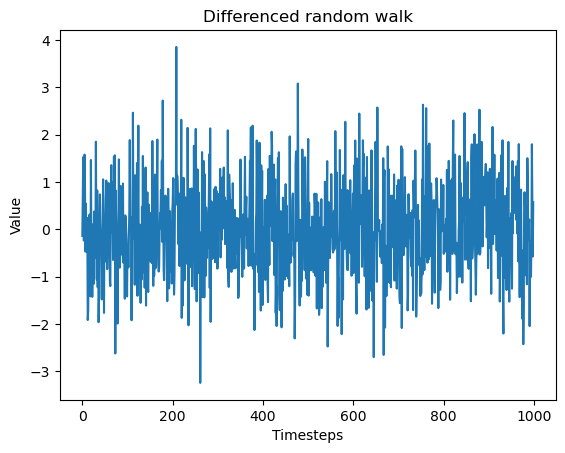

In [11]:
fig, ax = plt.subplots()

ax.plot(diff_random_walk)
ax.set_title("Differenced random walk")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")


In [12]:
diff_adf_result = adfuller(diff_random_walk)
print(f"ADF stats: {diff_adf_result[0]}")
print(f"p-value: {diff_adf_result[1]}")

ADF stats: -31.789310857560594
p-value: 0.0


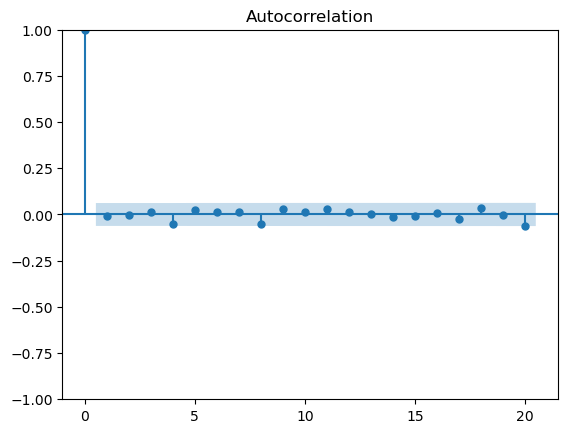

In [15]:
plot_acf(diff_random_walk, lags=20);

## Check GOOGL for random walk

In [16]:
import pandas as pd

df = pd.read_csv("data/GOOGL.csv")

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


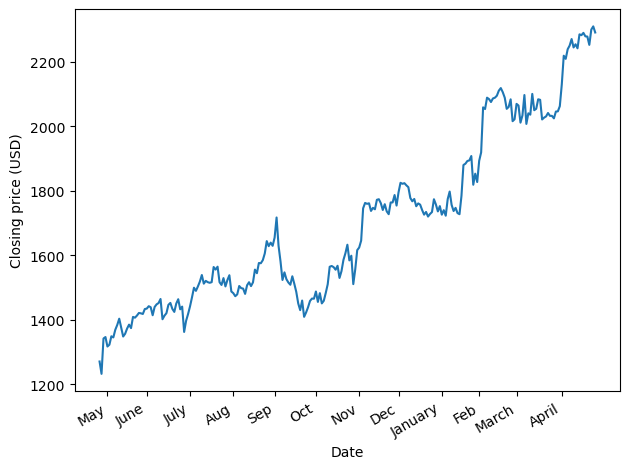

In [17]:
fig, ax = plt.subplots()

ax.plot(df["Date"], df["Close"])
ax.set_xlabel("Date")
ax.set_ylabel("Closing price (USD)")

plt.xticks([4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235],
           ["May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec", "January", "Feb", "March", "April"])

fig.autofmt_xdate()
plt.tight_layout()

In [18]:
GOOGL_adf_result = adfuller(df["Close"])
print(f"ADF stats: {GOOGL_adf_result[0]}")
print(f"p-value: {GOOGL_adf_result[1]}")

ADF stats: 0.16025048664771302
p-value: 0.9699419435913057


In [19]:
# Make ts stationary

diff_close = np.diff(df["Close"], n=1)

In [20]:
GOOGL_diff_adf_result = adfuller(diff_close)
print(f"ADF stats: {GOOGL_diff_adf_result[0]}")
print(f"p-value: {GOOGL_diff_adf_result[1]}")

ADF stats: -5.303439704295234
p-value: 5.3865309614545585e-06


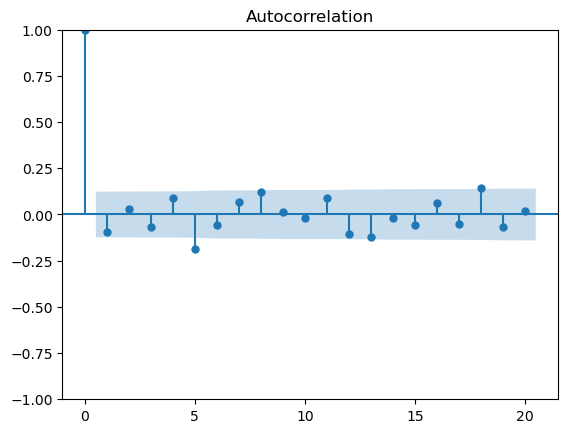

In [21]:
plot_acf(diff_close, lags=20);